## Statistische Hypothesen und Statistische Tests

Die folgenden beiden Zellen laden notwendige Imports und setzen eine besser lesbare Grösse für generierte Tabellen.

Sie können beide Zellen ausführen indem sie die Zelle:

* Per Mausklick selektieren
* Die Tastenkombination `STRG`-`ENTER` (`CTRL`-`ENTER` auf engl. Tastatur) drücken




In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math as m
from plotly.tools import FigureFactory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 90%;
}
</style>

## Simulation eines A/B Tests

Die folgenden Zellen erlauben uns die Durchführung eines A/B Tests zu simulieren. 
* Die Ausführung der übernächsten Zelle erzeugt zwei Stichproben basierend der vorgegebenen Wahrscheinlichkeit p und der Stichprobengrösse
* Jede Ausführung per `STRG-ENTER` erzeugt neue zufällig verteilte Stichproben.

## Erzeugung zufälliger Stichproben
```python
rsv_binom_A = stats.binom.rvs(size=1000, n=100, p=0.5)
rsv_binom_B = stats.binom.rvs(size=1000, n=100, p=0.501)
t_test = stats.ttest_ind(rvs_binom_A,rsv_binom_B)
```

In [129]:
rvs_binom_A = stats.binom.rvs(size=1000, n=100, p=0.5)
rsv_binom_B = stats.binom.rvs(size=1000, n=100, p=0.501)

t_test = stats.ttest_ind(rvs_binom_A,rsv_binom_B)

if t_test.pvalue < 0.05:
    print('Significant p-value found:' + '{:.3f}'.format(t_test.pvalue))
    matrix_twosample = [
    ['', 'total conversions', 'mean', 'std'],
    ['Group A', '{:.0f}'.format(rvs_binom_A.sum()), '{:.2f}'.format(rvs_binom_A.mean()), '{:.2f}'.format(rvs_binom_A.std())],
    ['Group B', '{:.0f}'.format(rsv_binom_B.sum()), '{:.2f}'.format(rsv_binom_B.mean()), '{:.2f}'.format(rsv_binom_B.std())]
    ]
    twosample_table = FF.create_table(matrix_twosample, index=True)
    iplot(twosample_table, filename='twosample-table')
else:
    print('No significant p-value found:' + '{:.3f}'.format(t_test.pvalue))

Significant p-value found:0.001


Die Ausführung der folgenden Zelle erlaubt es die beiden zufälligen Stichproben miteinander zu vergleichen.

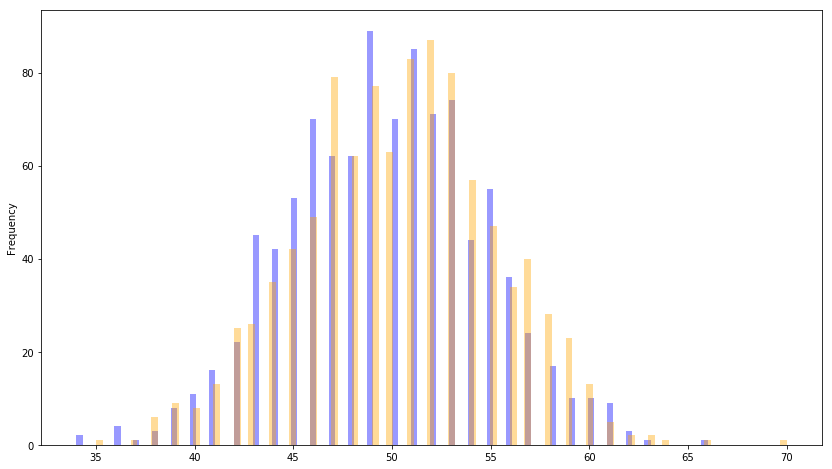

In [130]:
fig, ax = plt.subplots(figsize=(14,8))
pd.Series(rvs_binom_A).plot(kind="hist", bins = 100, alpha=0.4, color = 'blue')
pd.Series(rsv_binom_B).plot(kind="hist", bins = 100, alpha=0.4, color = 'orange')

## Statistisches Testen - Cutting Edge?

| papers ACL 2017 | papers that do report sign. | papers that do not report sign. |
|-----------------|---------------------------------|---------------------------------|
| 180             | 63                              | 117                             |
| 100%            | 35%                             | 65%    |                             

| papers that reported  | use wrong test | do not mention which test  | papers that correctly applied sign. |
|-----------------------|----------------|----------------------------|-------------------------------------|
| 63                    | 6              | 21                         | 36                                  |
| 100%                  | 9,5%           | 33,3%                      | 20% of total conf.                  |

## Referenzen
* [1] History of A/B Testing: https://www.wired.com/2012/04/ff-abtesting/
* [2] Summary of A/B Testing: https://hbr.org/2017/09/the-surprising-power-of-online-experiments
* [3] Produkt-integriertes A/B Testing
     * https://developer.amazon.com/it/blogs/tag/AB+Testing
     * https://www.facebook.com/business/help/296679177443789
     * https://www.facebook.com/business/help/165866720571247?helpref=faq_content#
* [4] Beispiele für in-house A/B Testing
     * https://medium.com/wolfgangbremer/amazon-is-the-king-of-a-b-testing-f46008e3b528
     * https://ai.stanford.edu/~ronnyk/ExPThinkWeek2009Public.pdf
    
